<a href="https://colab.research.google.com/github/mengheng02/deep-learning-works/blob/main/ANN_for_xor_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Matplotlib: a package for data visualization
3.   Skearn: a package including many machine learning approaches
4.   Tensorflow: a package for neural networks modeling
5.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding
from sklearn.metrics import accuracy_score #helps to evaluate the prediction accuracy
import keras #helps for ANN model construction
import tensorflow as tf #helps for ANN model construction

# Create data set of xor problem
Data structure and data visualiazation


In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])  #input
y = np.array([[0],[1],[1],[0]])          #corresponding labels

In [ ]:
print ('Size of X:', X.shape) #Size of input
print ('Size of y:', y.shape) #Size of labels

Size of X: (4, 2)
Size of y: (4, 1)


In [ ]:
onehot = OneHotEncoder()                     #An objective for one-hot package
y_onehot = onehot.fit_transform(y).toarray() #Transform labels to be the one-hot format. For example, a sample belongs to the first class(denoted by 0), then its label will be transformed to be [1, 0, 0] for a three-way classification.

In [ ]:
print (y_onehot.shape) #Size of labels after transformation
print (y[0])
print (y_onehot[0])

(4, 2)
[0]
[1. 0.]


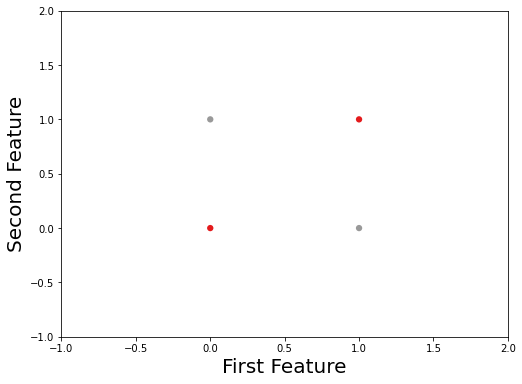

In [ ]:
# Visualization
fig = plt.figure(1, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="None", s=40)
plt.xlabel("First Feature", fontsize=20)
plt.ylabel("Second Feature", fontsize=20)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

# Model training via ANN with linear layer
Result reveals that the ANN with linear layer could not classifier the xor data successfully

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, input_shape=(2,))) # we have two neurons for output and two neurons for input
model.add(keras.layers.Activation("softmax"))      # softmax is used for probability estimation, which is suitable for classification tasks
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-1), 'binary_crossentropy', metrics='acc') # compile the model with a SGD optimizer, a loss of binary crossentropy, and an accuracy metric
model.fit(X, y_onehot, epochs = 100, batch_size = 4, verbose = 2) #training the model

Epoch 1/100
1/1 - 0s - loss: 0.7865 - acc: 0.5000 - 482ms/epoch - 482ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7841 - acc: 0.2500 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7818 - acc: 0.2500 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7795 - acc: 0.2500 - 4ms/epoch - 4ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7774 - acc: 0.2500 - 4ms/epoch - 4ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7752 - acc: 0.2500 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7732 - acc: 0.2500 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.7711 - acc: 0.2500 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 0.7692 - acc: 0.2500 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 0.7673 - acc: 0.2500 - 8ms/epoch - 8ms/step
Epoch 11/100
1/1 - 0s - loss: 0.7654 - acc: 0.2500 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 0.7636 - acc: 0.2500 - 3ms/epoch - 3ms/step
Epoch 13/100
1/1 - 0s - loss: 0.7619 - acc: 0.2500 - 3ms/epoch - 3ms/step
Epoch 14/100
1/1 - 0s - loss: 0.7601 - acc:

In [ ]:
prediction = [np.argmax(item) for item in model.predict(X)]
print ('Accracy with an one-layer ANN:', accuracy_score(prediction, y))

Accracy with a one-layer ANN: 0.5


# Model training via a nonlinear ANN
A ten-neuron hidden layer with ReLU activation function is used.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(2,))) # In the first layer, we have ten neurons for output and two neurons for input
model.add(keras.layers.Activation("relu")) # a non-linear activation function called Rectified Linear Unit (ReLU) is employed
model.add(keras.layers.Dense(2)) # In the second layer, we have two neurons for output and ten neurons for input
model.add(keras.layers.Activation("softmax"))      # softmax is used for probability estimation, which is suitable for classification tasks
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-1), 'binary_crossentropy', metrics='acc') # compile the model with a SGD optimizer, a loss of binary crossentropy, and an accuracy metric
model.fit(X, y_onehot, epochs = 100, batch_size = 4, verbose = 2) #training the model

Epoch 1/100
1/1 - 1s - loss: 0.7084 - acc: 0.5000 - 676ms/epoch - 676ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7070 - acc: 0.2500 - 6ms/epoch - 6ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7057 - acc: 0.2500 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7044 - acc: 0.2500 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7031 - acc: 0.2500 - 3ms/epoch - 3ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7019 - acc: 0.2500 - 6ms/epoch - 6ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7007 - acc: 0.2500 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6995 - acc: 0.2500 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6983 - acc: 0.2500 - 12ms/epoch - 12ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6972 - acc: 0.2500 - 7ms/epoch - 7ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6961 - acc: 0.2500 - 3ms/epoch - 3ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6950 - acc: 0.5000 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6939 - acc: 0.5000 - 4ms/epoch - 4ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6929 - 

In [ ]:
prediction = [np.argmax(item) for item in model.predict(X)]
print ('Accracy with a nonlinear-layer ANN:', accuracy_score(prediction,y))

Accracy with a nonlinear-layer ANN: 1.0
